### Neurons

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_ = np.array([[3, 5],
               [5, 1],
               [10, 2]])
y_ = np.array([75, 82, 93])

In [62]:
x_norm = x_/np.amax(x_, axis=0)
y_norm = x_/100

$$\begin{bmatrix} 3 & 5 \\ 5 & 1 \\ 10 & 2 \end{bmatrix}\begin{bmatrix} w_{11}^{(1)}  & w_{12}^{(1)} & w_{13}^{(1)} 
\\ w_{21}^{(1)} & w_{22}^{(1)} & w_{23}^{(1)} \end{bmatrix} = 
\begin{bmatrix}
   3w_{11}^{(1)} + 5w_{21}^{(1)} & 3w_{12}^{(1)} + 5w_{22}^{(1)} & 3w_{13}^{(1)} + 5w_{23}^{(1)} 
\\ 5w_{11}^{(1)} + w_{21}^{(1)} & 5w_{12}^{(1)} + w_{22}^{(1)} & 5w_{13}^{(1)} + w_{23}^{(1)} 
\\ 10w_{11}^{(1)} + 2w_{21}^{(1)} & 10w_{12}^{(1)} + 2w_{22}^{(1)} & 10w_{13}^{(1)} + 2w_{23}^{(1)} 
\end{bmatrix} $$
<br>
$$
\begin{equation*} 
Z^{(2)} = XW^{(1)}
\end{equation*} \tag{1}$$
Where &emsp; $ Z^{(2)} $ is a 3x3 matrix
<br> &emsp;&emsp;&emsp;&emsp; $ W^{(1)} $ is the first hidden layer weight



In [63]:
def sigmoid(z):
    # Sigmoid activation function
    return 1/(1+np.exp(-z))

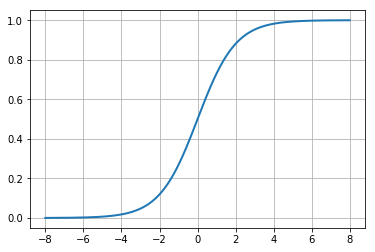

In [64]:
input_ = np.arange(-8,8,0.01)
plt.plot(input_, sigmoid(input_), linewidth=2)
plt.grid(1)

##### <center> Sigmoid function
$$\begin{equation*} \tag{2} f = \frac{1}{1+e^{-z}} \end{equation*} $$
<br>
$$ \begin{equation*} \tag{2}   a^{(2)}= f(z^{(2)}) \end{equation*} $$
Where &emsp; $ a^{(2)} $ is a 3x3 matrix


##### <center> Second hidden layer
$$\begin{equation*} \tag{3} z^{(3)} = a^{(2)}W^{(2)}  \end{equation*} $$
Where &emsp; $ W^{(2)} $ is a 3x1 matrix, second hidden layer weight
<br>&emsp;&emsp;&emsp;&emsp; $z^{(3)}$ is a 3x1 matrix


##### <center> Output prediction
$$\begin{equation*} \tag{4} \hat{y} = f(z^{(3)}) \end{equation*} $$

In [76]:
class Neural_Network(object):
    def __init__(self):
        # Hyperparamters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        # Weights (Paramters)
        self.W1 = np.random.randn(self.inputLayerSize, 
                                  self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, 
                                  self.outputLayerSize)
        
    def forward(self, X):
        # Input propagation through network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        y_ = self.sigmoid(self.z3)
        return y_
    
    def sigmoid(self, z):
    # Sigmoid activation function
        return 1/(1+np.exp(-z))
    
    def weights(self):
        print(self.W1)
        print(self.W2)

##### Minimize cost function
$$ \begin{equation*} \tag{5}  J = \sum_{} \frac{1}{2}(y - \hat{y})^{2}  \end{equation*}$$

##### Combining all equations together
$$ \begin{equation*} \tag{5}  J = \sum_{} \frac{1}{2}(y - f(f(XW^{(1)})W^{(2)})^{2}  \end{equation*}$$

We have 9 weights, find the best combination to minimize the cost
<br> $$ w_{11}^{(1)} w_{12}^{(1)} w_{13}^{(1)} $$ 
<br> $$ w_{21}^{(1)} w_{22}^{(1)} w_{23}^{(1)} $$
<br> $$ w_{11}^{(2)} w_{12}^{(2)} w_{13}^{(2)} $$ 

##### Optimize!

Where we need to find the solutions to $  \frac{\partial J}{\partial W^{(1)}} , \frac{\partial J}{\partial W^{(2)}}$
$$\frac{\partial J}{\partial W^{(1)}} = \begin{bmatrix}
   \frac{\partial J}{\partial W_{11}^{(1)}} & \frac{\partial J}{\partial W_{12}^{(1)}} & \frac{\partial J}{\partial W_{13}^{(1)}} 
\\ \frac{\partial J}{\partial W_{21}^{(1)}} & \frac{\partial J}{\partial W_{22}^{(1)}} & \frac{\partial J}{\partial W_{23}^{(1)}}
\end{bmatrix} $$
<br>
$$\frac{\partial J}{\partial W^{(2)}} = \begin{bmatrix}
   \frac{\partial J}{\partial W_{11}^{(2)}}  
\\ \frac{\partial J}{\partial W_{21}^{(2)}} 
\\ \frac{\partial J}{\partial W_{31}^{(2)}} 
\end{bmatrix} $$

##### Starting with $ \frac{\partial J}{\partial W^{(2)}} $

$$\begin{equation*} \frac{\partial J}{\partial W^{(2)}} =  \frac{\partial \sum_{} \frac{1}{2}(y - \hat{y})^{2}}{\partial W^{(2)}} \end{equation*}$$
<br> Where using "Sum Rule In Differentiation" <br>
$ \frac{d}{dx}(u+v) = \frac{du}{dx} + \frac{dv}{dx} $
<br><br>
The equation becomes
$$\begin{equation*} \frac{\partial J}{\partial W^{(2)}} =   \sum_{} (y - \hat{y})\frac{\partial (y - \hat{y})}{\partial W^{(2)}} \end{equation*}$$
$$\begin{equation*} \frac{\partial J}{\partial W^{(2)}} =   \sum_{}(-1) (y - \hat{y})\frac{\partial \hat{y}}{\partial z^{(3)}}\frac{\partial  z^{(3)}}{\partial W^{(2)}} \end{equation*}$$
<br> Sidestepping, where we have   $$\hat{y} = f(z^{(3)})$$
<br> $$ f(z) = \frac{1}{1+e^{-z}} $$
<br> $$ f'(z) = \frac{e^{(-z)}}{(1+e^{-z})^2} $$
<br> Rewritten as $$ f'(z) = f(z)(1-f(z)) $$

In [87]:
def sigmoid_(z):
    # Derivative of Sigmoid function
    return sigmoid(z)*(1-sigmoid(z))

In [85]:
NN = Neural_Network()
yHat = NN.forward(x_)
NN.weights()

[[ 0.33351467 -0.64715228 -0.23377524]
 [ 1.2374778   2.29407214  0.10689482]]
[[-1.2761817 ]
 [ 1.31437885]
 [ 0.31187822]]


In [86]:
yHat

array([[0.54538103],
       [0.31841837],
       [0.25624775]])